# PROJECT
# A/B testing of three marketing campaigns for a new product.
A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

Goal is to evaluate A/B testing results and decide which marketing strategy works the best.

Columns

Marketid: unique identifier for market

MarketSize: size of market area by sales

Promotion: one of three promotions that were tested

Week: Weeks when the promotions were run and the sales

In [34]:
import pandas as pd
import numpy as np

data = {'Market_id': [1, 2, 3, 4, 5, 6, 7, 8, 9],
        'Promotion': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
        'Week 1 Sales': [200, 150, 250, 175, 200, 250, 353, 543, 521],
        'Week 2 Sales': [250, 175, 300, 250, 225, 275, 432, 254, 342],
        'Week 3 Sales': [300, 250, 350, 325, 300, 325, 234, 456, 568],
        'Week 4 Sales': [350, 325, 400, 375, 350, 375, 567, 239, 674]}

df = pd.DataFrame(data)

# add the 'Market Size' column
df['Market Size'] = np.random.choice(['small', 'medium', 'large'], df.shape[0])


df

,Market_id,Promotion,Week 1 Sales,Week 2 Sales,Week 3 Sales,Week 4 Sales,Market Size
0,1,A,200,250,300,350,medium
1,2,B,150,175,250,325,medium
2,3,C,250,300,350,400,large
3,4,A,175,250,325,375,medium
4,5,B,200,225,300,350,medium
5,6,C,250,275,325,375,medium
6,7,A,353,432,234,567,medium
7,8,B,543,254,456,239,large
8,9,C,521,342,568,674,large


# Evaluate A/B testing results and decide which marketing strategy works the best.

In [35]:
df.describe()

,Market_id,Week 1 Sales,Week 2 Sales,Week 3 Sales,Week 4 Sales
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,5.000000,293.555556,278.111111,345.333333,406.111111
std,2.738613,147.245638,74.049721,105.041658,132.488155
min,1.000000,150.000000,175.000000,234.000000,239.000000
25%,3.000000,200.000000,250.000000,300.000000,350.000000
50%,5.000000,250.000000,254.000000,325.000000,375.000000
75%,7.000000,353.000000,300.000000,350.000000,400.000000
max,9.000000,543.000000,432.000000,568.000000,674.000000


In [36]:
# calculate the mean sales for each promotion
mean_sales = df.groupby('Promotion')[['Week 1 Sales', 'Week 2 Sales', 'Week 3 Sales', 'Week 4 Sales']].mean()

# calculate the standard deviation of sales for each promotion
std_sales = df.groupby('Promotion')[['Week 1 Sales', 'Week 2 Sales', 'Week 3 Sales', 'Week 4 Sales']].std()

# calculate the confidence intervals for each promotion
confidence_interval = 1.96 * std_sales / np.sqrt(df.shape[0])

# print the mean sales and confidence intervals for each promotion
print(mean_sales)
print(std_sales)
print(confidence_interval)


           Week 1 Sales  Week 2 Sales  Week 3 Sales  Week 4 Sales
Promotion                                                        
A            242.666667    310.666667    286.333333    430.666667
B            297.666667    218.000000    335.333333    304.666667
C            340.333333    305.666667    414.333333    483.000000
           Week 1 Sales  Week 2 Sales  Week 3 Sales  Week 4 Sales
Promotion                                                        
A             96.365623    105.077749     47.014182    118.727980
B            213.930674     39.962482    107.449213     58.226569
C            156.461923     33.857545    133.665004    165.882489
           Week 1 Sales  Week 2 Sales  Week 3 Sales  Week 4 Sales
Promotion                                                        
A             62.958874     68.650796     30.715932     77.568947
B            139.768040     26.108822     70.200152     38.041358
C            102.221790     22.120263     87.327803    108.376559


# Using statistical hypothesis testing, such as ANOVA test, to determine if there is a significant difference in sales across the different promotions

In [37]:
from scipy.stats import f_oneway

# group the data by promotion and calculate the total sales for each group
sales_by_promotion = df.groupby('Promotion')[['Week 1 Sales', 'Week 2 Sales', 'Week 3 Sales', 'Week 4 Sales']].sum()


# reshape the data to a format that can be used in an ANOVA test
sales_data = sales_by_promotion.stack().reset_index()
sales_data.columns = ['Promotion', 'Week', 'Sales']

# perform the ANOVA test
f_stat, p_value = f_oneway(sales_data[sales_data['Promotion'] == 'A']['Sales'],
                           sales_data[sales_data['Promotion'] == 'B']['Sales'],
                           sales_data[sales_data['Promotion'] == 'C']['Sales'])

# print the p-value
print("p-value:", p_value)


p-value: 0.1974343944825783


A p-value is used in hypothesis testing to determine the significance of a result. A low p-value (< 0.05) indicates that the results are statistically significant, while a high p-value (> 0.05) indicates that the results are not statistically significant.

In this case, the p-value of 0.197 is greater than 0.05, which means that there is not enough evidence to reject the null hypothesis that there is no difference in sales across the different promotions. Therefore, we cannot conclude that there is a statistical difference between the marketing strategies.

# Show which marketing strategy that works the best.
To evaluate A/B testing results and decide which marketing strategy works the best, you can use several techniques such as mean, standard deviation, and confidence intervals. You can also use statistical hypothesis testing such as a chi-squared test or ANOVA test to determine the significance of the results.

Once you have calculated the mean sales, standard deviation of sales, and confidence intervals for each promotion, you can compare them to determine which promotion had the greatest effect on sales.

For example, if the mean sales for Promotion A is significantly higher than the mean sales for Promotion B and Promotion C, and the confidence intervals for Promotion A do not overlap with the confidence intervals for the other promotions, then you can conclude that Promotion A had the greatest effect on sales.

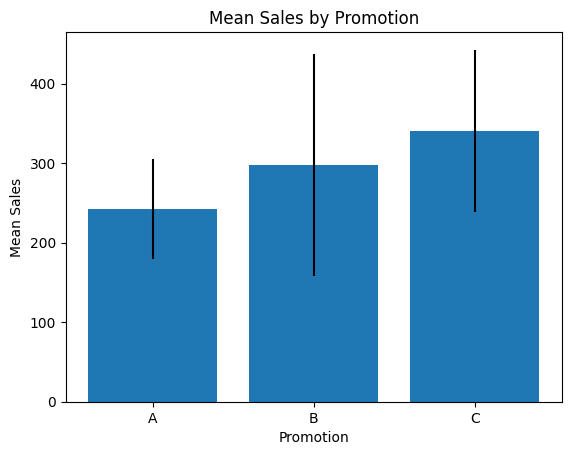

In [38]:
import matplotlib.pyplot as plt

# create the bar chart
plt.bar(mean_sales.index, mean_sales['Week 1 Sales'], yerr=confidence_interval['Week 1 Sales'])

# add labels to the axes
plt.xlabel('Promotion')
plt.ylabel('Mean Sales')
plt.title('Mean Sales by Promotion')

# show the chart
plt.show()
